In [1]:
import torch
import os
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from pathlib import Path

c:\Users\tunga\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
image_path = Path("Sugarcane Dataset")

Data Exploration

In [4]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 5 directories and 0 images in 'Sugarcane Dataset'.
There are 0 directories and 522 images in 'Sugarcane Dataset\Healthy'.
There are 0 directories and 462 images in 'Sugarcane Dataset\Mosaic'.
There are 0 directories and 518 images in 'Sugarcane Dataset\RedRot'.
There are 0 directories and 514 images in 'Sugarcane Dataset\Rust'.
There are 0 directories and 505 images in 'Sugarcane Dataset\Yellow'.


Random Image Path: Sugarcane Dataset\RedRot\redrot (122).jpeg
Image Class: RedRot
Image Height: 360
Image Width: 269


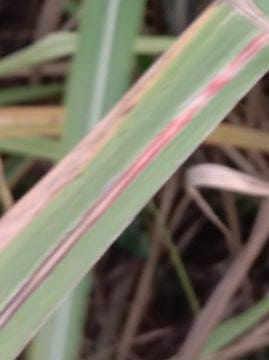

In [5]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*.jpeg"))

random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random Image Path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")
img

(-0.5, 268.5, 359.5, -0.5)

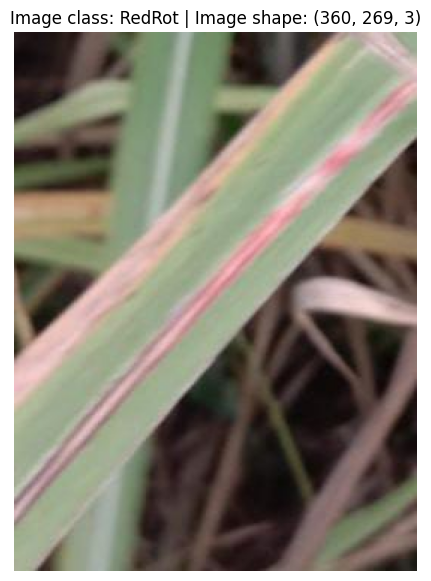

In [6]:
img_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False)

Transforming Data


In [7]:
data_tansfrom = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [8]:
data_tansfrom(img).shape

torch.Size([3, 224, 224])

In [16]:
dataset = datasets.ImageFolder(root=image_path, transform= data_tansfrom)
train_ratio = 0.8
test_ratio = 0.2
dataset

Dataset ImageFolder
    Number of datapoints: 2521
    Root location: Sugarcane Dataset
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [21]:
targets = np.array([label for _, label in dataset.samples])
targets

array([0, 0, 0, ..., 4, 4, 4])

In [22]:
def stratified_split_indices(targets, train_ratio):
    indices = np.arange(len(targets))
    train_indices = []
    test_indices = []

    for class_idx in np.unique(targets):
        class_indices = indices[targets == class_idx]
        np.random.shuffle(class_indices)
        split_point = int(len(class_indices) * train_ratio)
        train_indices.extend(class_indices[:split_point])
        test_indices.extend(class_indices[split_point:])

    return train_indices, test_indices

In [26]:
train_indices, test_indices = stratified_split_indices(targets, train_ratio)

In [27]:
from torch.utils.data import Subset

train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

In [28]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [31]:
train_targets = targets[train_indices]
test_targets = targets[test_indices]

print(f'Training set class distribution: {np.bincount(train_targets)}')
print(f'Testing set class distribution: {np.bincount(test_targets)}')

Training set class distribution: [417 369 414 411 404]
Testing set class distribution: [105  93 104 103 101]
